# Boreal polar map of ecotone

In [3]:
library(aws.s3)
library(rgdal)
library(raster)
library(tidyverse)
library(dplyr)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(data.table)

library(fs)
library(sf)
library(rgdal)


library(rgeos)
library(mapproj)
#library(rgee)
library(viridis)
library(wesanderson)
library(scales)
library(tools)
library(patchwork)

library(rnaturalearth)
library(rnaturalearthdata)


#conda install -c conda-forge r-rnaturalearth r-rnaturalearthdata r-mapproj r-rgeos r-viridis r-wesanderson r-patchwork r-aws.s3 r-feather r-rockchalk

Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.3.2, released 2021/09/01
Path to GDAL shared files: /opt/conda/envs/r-with-gdal/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 8.0.1, March 5th, 2021, [PJ_VERSION: 801]
Path to PROJ shared files: /opt/conda/envs/r-with-gdal/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks raster::extract()
✖ dplyr::filter() 

In [118]:
source('/projects/code/3dsi/boreal_map_functions.R') 

[1] "MAAP"
[1] "MAAP"


## Map showing boreal tile extent

In [107]:
ext = extent(-180,180,40,90)

In [91]:
ecotone_fn = '/projects/my-public-bucket/databank/hydrobasins_L08_patterns_tte.gpkg'
ecotone_fn = '/projects/my-public-bucket/databank/hydrobasins_L08_patterns_tte_boreal_tundra.gpkg'

study_domain_fn = '/projects/my-public-bucket/databank/boreal_height_cmip_extent_polygons.gpkg'

In [92]:
options(warn=-1)

study_domain = shp_fort_join(study_domain_fn, ext, REPROJECT=FALSE, CROP=FALSE)

[1] "Using sf and coercing to Spatial object..."
Reading layer `boreal_height_cmip_extent_polygons' from data source 
  `/projects/my-public-bucket/databank/boreal_height_cmip_extent_polygons.gpkg' 
  using driver `GPKG'
Simple feature collection with 47 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -168.1318 ymin: 44.21279 xmax: -54.29206 ymax: 71.99637
Geodetic CRS:  WGS 84


Regions defined for each Polygons



In [93]:
options(warn=-1)

ecotone = shp_fort_join(ecotone_fn, ext, REPROJECT=FALSE, CROP=FALSE)

[1] "Using sf and coercing to Spatial object..."
Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra' from data source 
  `/projects/my-public-bucket/databank/hydrobasins_L08_patterns_tte_boreal_tundra.gpkg' 
  using driver `GPKG'
Simple feature collection with 23165 features and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -167.8668 ymin: 43.2 xmax: -52.61605 ymax: 70.25898
Geodetic CRS:  WGS 84


Regions defined for each Polygons



In [94]:
ecotone = ecotone %>% mutate(pattern_class = factor(pattern_class))
head(ecotone)

,long,lat,order,hole,piece,id,group,HYBAS_ID,pattern_class
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<chr>,<fct>
1,-79.73817,51.33540,1,FALSE,1,1,1.1,7080024740,TTE diffuse
2,-79.73664,51.35443,2,FALSE,1,1,1.1,7080024740,TTE diffuse
3,-79.73041,51.35007,3,FALSE,1,1,1.1,7080024740,TTE diffuse
4,-79.72435,51.35788,4,FALSE,1,1,1.1,7080024740,TTE diffuse
5,-79.72565,51.36044,5,FALSE,1,1,1.1,7080024740,TTE diffuse
6,-79.73337,51.36955,6,FALSE,1,1,1.1,7080024740,TTE diffuse


In [95]:

# COLOR_DICT = c('#00441b', 'red', 'dark red', 'light green', 'green','black')
# names(COLOR_DICT) = levels(ecotone$pattern_class)
# COLOR_DICT

In [96]:
levels(ecotone$pattern_class) 

[1] "boreal"            "TTE abrupt"        "TTE abrupt (edge)"
[4] "TTE diffuse"       "TTE uniform"       "tundra"

In [97]:
COLOR_DICT = c('boreal'='#00441b', 'TTE abrupt'='red', 'TTE abrupt (edge)'='dark red', 'TTE diffuse'='light green', 'TTE uniform'='green','tundra'='black')
LEVS_RENAMED = c('boreal', "abrupt", 'abrupt (edge)',  "diffuse", 'uniform', 'tundra')
ecotone$pattern_class_adj <- factor(ecotone$pattern_class)#, levels = LEVS_RENAMED)
levels(ecotone$pattern_class_adj) = LEVS_RENAMED
pattern_class_colors <- c('#00441b', viridis::plasma(n = 4), '#969696')
names(pattern_class_colors) <- levels(ecotone$pattern_class_adj)
name_landscape_patterns = "Landscape pattern class"   #"Taiga-tundra ecotone\nlandscape pattern class"
scale_color_landscape_pattern_class <- scale_colour_manual(values = pattern_class_colors, name = name_landscape_patterns)
scale_fill_landscape_pattern_class <- scale_fill_manual(values = pattern_class_colors, name = name_landscape_patterns)

In [98]:
head(ecotone)

,long,lat,order,hole,piece,id,group,HYBAS_ID,pattern_class,pattern_class_adj
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<chr>,<fct>,<fct>
1,-79.73817,51.33540,1,FALSE,1,1,1.1,7080024740,TTE diffuse,diffuse
2,-79.73664,51.35443,2,FALSE,1,1,1.1,7080024740,TTE diffuse,diffuse
3,-79.73041,51.35007,3,FALSE,1,1,1.1,7080024740,TTE diffuse,diffuse
4,-79.72435,51.35788,4,FALSE,1,1,1.1,7080024740,TTE diffuse,diffuse
5,-79.72565,51.36044,5,FALSE,1,1,1.1,7080024740,TTE diffuse,diffuse
6,-79.73337,51.36955,6,FALSE,1,1,1.1,7080024740,TTE diffuse,diffuse


[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source 
  `/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



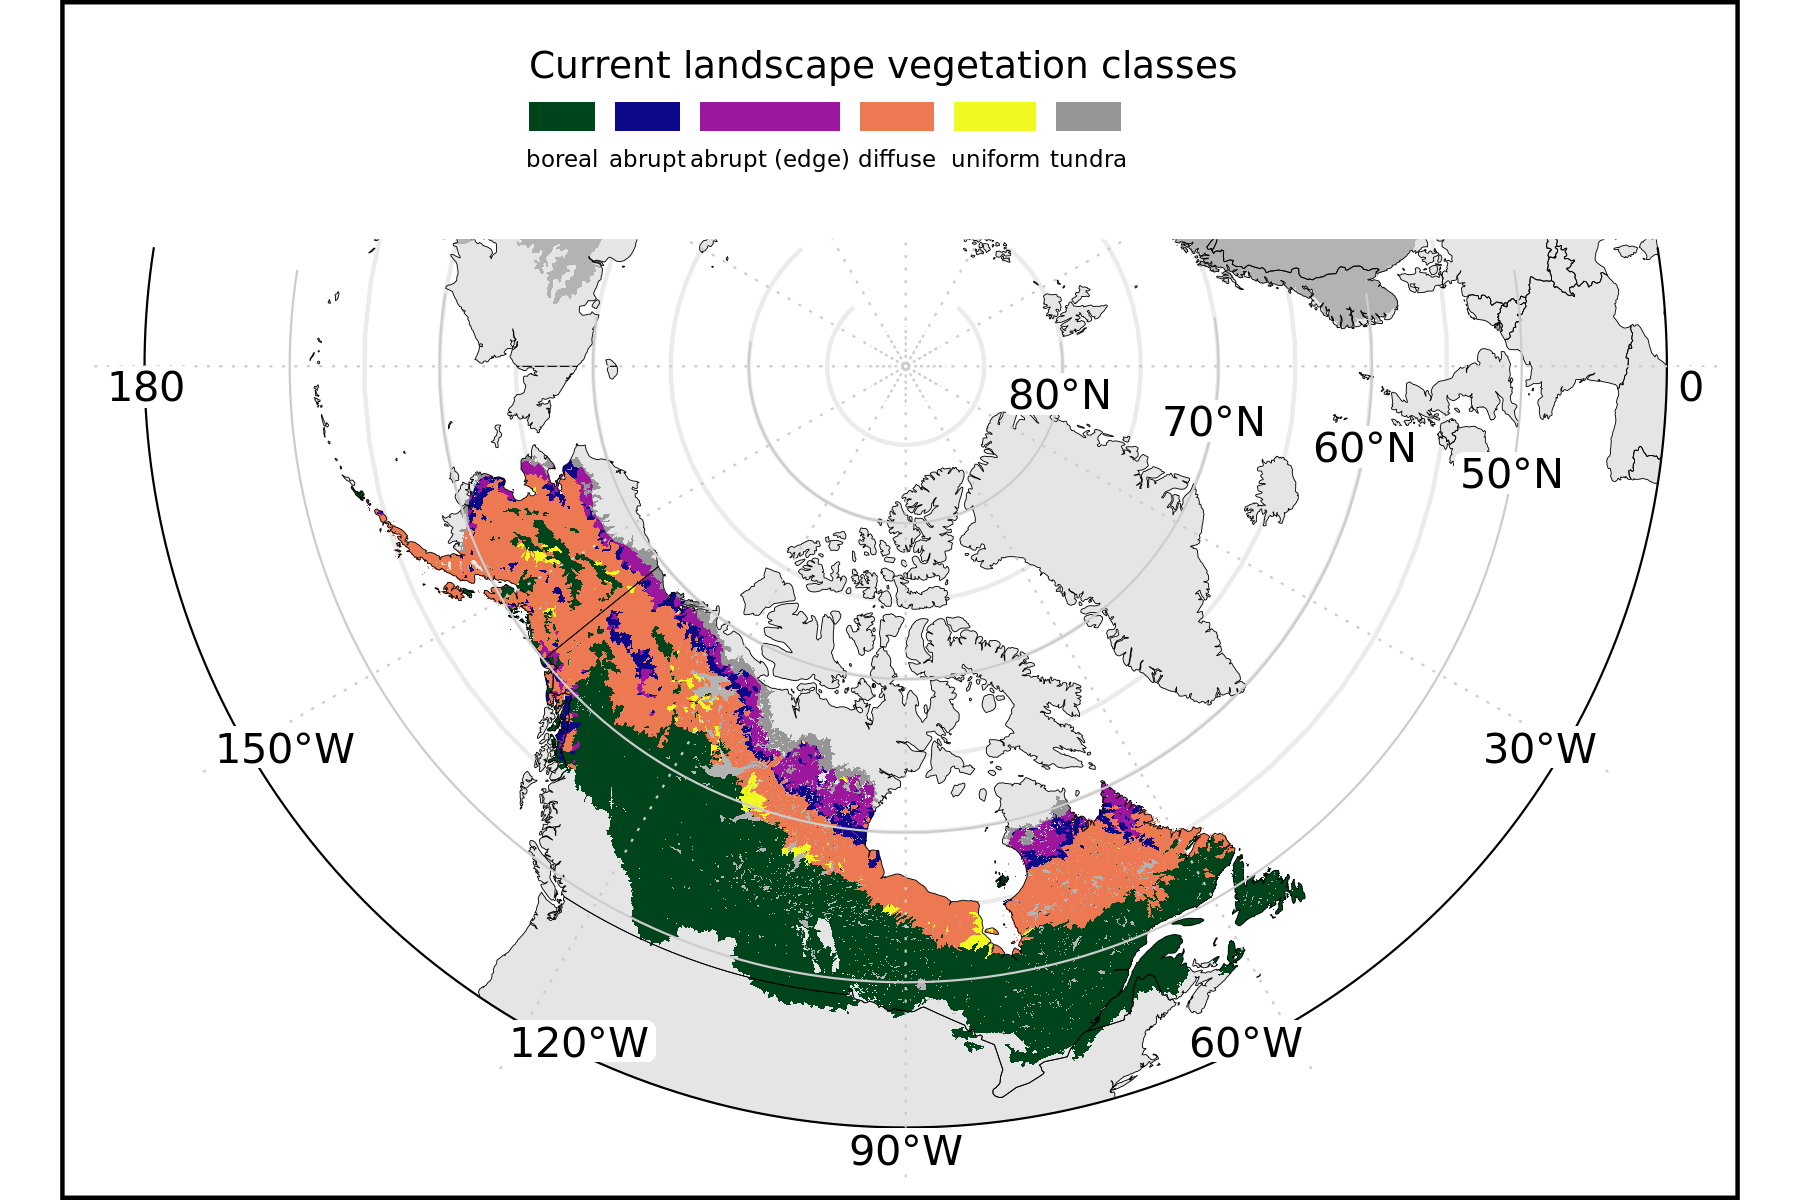

In [120]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn
                    ,LAYER_LIST = list(geom_polygon(data = head(ecotone,1000), aes(x = long, y = lat, group = group, fill=pattern_class_adj), size=0.1)) #, fill=NA
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_color_brewer(palette = 'Set2') +
    #scale_fill_viridis_d() +
    #scale_fill_manual( values = COLOR_DICT) +
    scale_fill_landscape_pattern_class +
    guides(fill=guide_legend(title="Current landscape vegetation classes", title.position = "top", label.position = "bottom", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1)) +
    theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1))
m_groups

In [130]:
study_domain$height_class_adj = factor(study_domain$height_class)
levels(study_domain$height_class_adj) = c('Main prediction domain', 'Extended training domain')
tail(study_domain)

,long,lat,order,hole,piece,id,group,level_0,level_1,height_class,height_class_adj
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<fct>
45059,-92.09521,69.62174,3,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45060,-92.09449,69.62081,4,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45061,-92.12474,69.61327,5,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45062,-92.13106,69.61275,6,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45063,-92.14072,69.61425,7,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain
45064,-92.17467,69.62340,8,FALSE,1,47,47.1,1,31,h_can to 0,Extended training domain


[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source 
  `/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



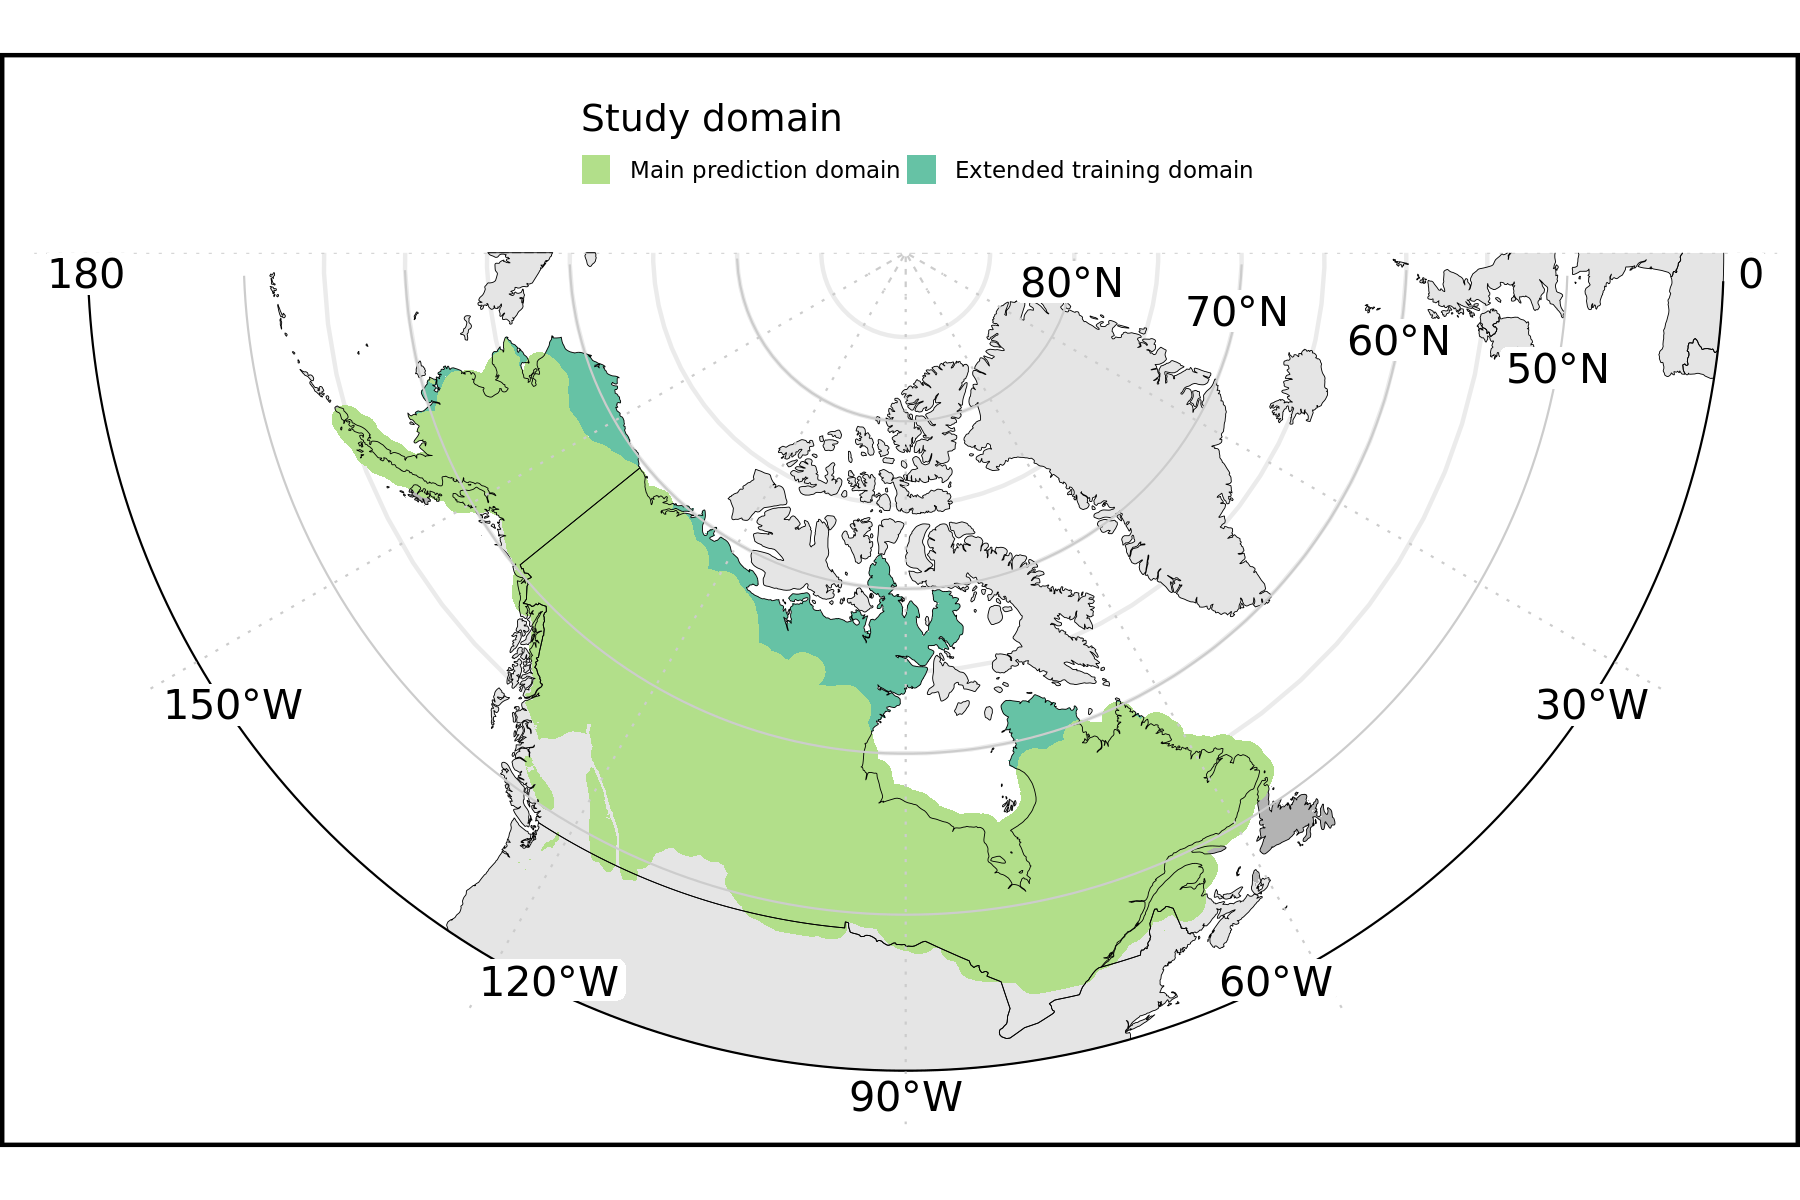

In [145]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn
                    ,LAYER_LIST = list(geom_polygon(data = study_domain , aes(x = long, y = lat, group = group, fill=height_class_adj), size=0.1)
                                       
                                      )
                            
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_fill_viridis_d(guide=FALSE, alpha=0.25) +
    scale_fill_manual( values = alpha(c('#b2df8a', '#66c2a5'), 1)) + 
     theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1)) +
    guides(fill=guide_legend(title="Study domain", title.position = "top", label.position = "right", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1))




m_groups 

In [ ]:
atl08_df = sample_frast_read('/projects/my-public-bucket/databank/boreal_height_cmip6/atl08_filt_20m.parquet')